In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
ds = pd.read_csv("iris.csv")

In [9]:
ds.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm       target
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [10]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
# Separating out the features

In [12]:
x = ds.loc[:, features].values

In [ ]:
# Separating out the target

In [16]:
y = ds.loc[:,['target']].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Standardizing the features

In [18]:
x = StandardScaler().fit_transform(x)

In [19]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [23]:
principalComponents = pca.fit_transform(x)

In [24]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [25]:
principalDf

principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
..                     ...                    ...
145               1.870522               0.382822
146               1.558492              -0.905314
147               1.520845               0.266795
148               1.376391               1.016362
149               0.959299              -0.022284

[150 rows x 2 columns]

In [ ]:
# concatenating DataFrames along columns to make finalDf before ploting

In [27]:
finalDf = pd.concat([principalDf, ds[['target']]], axis = 1)

In [28]:
finalDf

principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
..                     ...                    ...             ...
145               1.870522               0.382822  Iris-virginica
146               1.558492              -0.905314  Iris-virginica
147               1.520845               0.266795  Iris-virginica
148               1.376391               1.016362  Iris-virginica
149               0.959299              -0.022284  Iris-virginica

[150 rows x 3 columns]

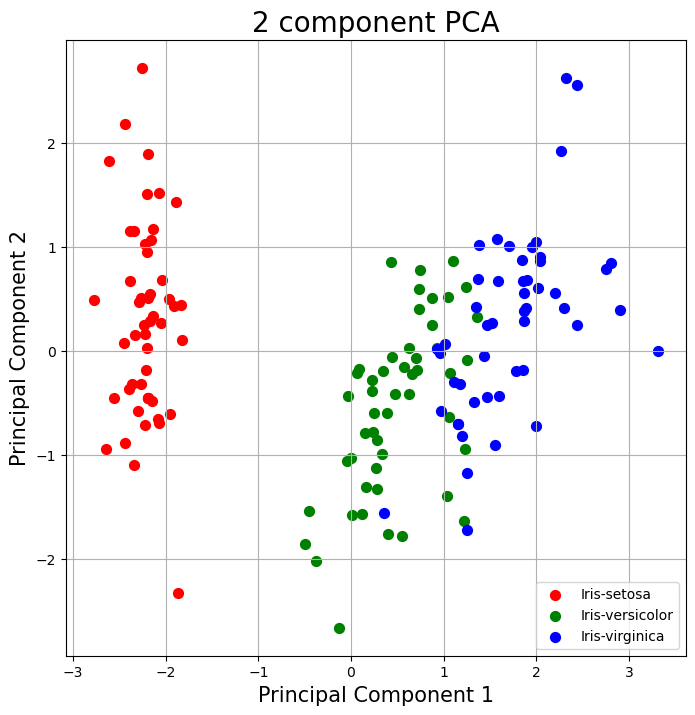

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [32]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])